In [2]:
import sys

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import warnings
warnings.simplefilter('ignore')

In [4]:
ds = pd.read_csv("C:/Users/Olena/Desktop/ITSS/files/variant_4.csv")

In [5]:
print('columns count - ',len(ds.columns), '\n')
print('columns: ',list(ds.columns))

columns count -  43 

columns:  ['Unnamed: 0', 'Marital status', 'Application mode', 'Application order', 'Course', 'Daytime/evening attendance\t', 'Previous qualification', 'Previous qualification (grade)', 'Nacionality', "Mother's qualification", "Father's qualification", "Mother's occupation", "Father's occupation", 'Admission grade', 'Displaced', 'Educational special needs', 'Debtor', 'Tuition fees up to date', 'Gender', 'Scholarship holder', 'Age at enrollment', 'International', 'Curricular units 1st sem (credited)', 'Curricular units 1st sem (enrolled)', 'Curricular units 1st sem (evaluations)', 'Curricular units 1st sem (approved)', 'Curricular units 1st sem (grade)', 'Curricular units 1st sem (without evaluations)', 'Curricular units 2nd sem (credited)', 'Curricular units 2nd sem (enrolled)', 'Curricular units 2nd sem (evaluations)', 'Curricular units 2nd sem (approved)', 'Curricular units 2nd sem (grade)', 'Curricular units 2nd sem (without evaluations)', 'Unemployment rate', 

In [6]:
print('Samples count: ',ds.shape[0])

Samples count:  4424


In [52]:
display(ds.head(15))

,Unnamed: 0,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,...,Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target,Citizenship,Family Position,Attendance,Field of Study,Special Needs
0,0,1,17,5,171.0,1.0,1.0,122.0,1,19,...,0,10.8,1.4,1.74,Dropout,Budapest,Youngest Child,Online,Science,Special Needs
1,1,1,15,1,9254.0,1.0,1.0,NaN,1,1,...,0,13.9,-0.3,0.79,Graduate,Oslo,NaN,Full-Time,Arts,NaN
2,2,1,1,5,9070.0,1.0,1.0,NaN,1,37,...,0,10.8,1.4,1.74,Dropout,Edinburgh,NaN,Part-Time,Commerce,NaN
3,3,1,17,2,9773.0,1.0,1.0,122.0,1,38,...,0,9.4,-0.8,-3.12,Graduate,Budapest,Middle Child,Part-Time,Commerce,No Special Needs
4,4,2,39,1,8014.0,0.0,1.0,100.0,1,37,...,0,13.9,-0.3,0.79,Graduate,London,Youngest Child,Part-Time,Commerce,No Special Needs
5,5,2,39,1,9991.0,0.0,19.0,NaN,1,37,...,5,16.2,0.3,-0.92,Graduate,Saint Petersburg,NaN,Part-Time,Medicine,NaN
6,6,1,1,1,9500.0,1.0,1.0,142.0,1,19,...,0,15.5,2.8,-4.06,Graduate,Prague,Middle Child,Full-Time,Engineering,Special Needs
7,7,1,18,4,9254.0,1.0,1.0,NaN,1,37,...,0,15.5,2.8,-4.06,Dropout,Amsterdam,NaN,Online,Science,NaN
8,8,1,1,3,9238.0,1.0,1.0,NaN,62,1,...,0,16.2,0.3,-0.92,Graduate,Istanbul,NaN,Evening Classes,Commerce,NaN
9,9,1,1,1,9238.0,1.0,1.0,138.0,1,1,...,0,8.9,1.4,3.51,Dropout,Barcelona,Youngest Child,Full-Time,Commerce,Special Needs


### Chek missing data

In [8]:
print("Any missing sample in training set:",ds.isnull().values.any())

Any missing sample in training set: True


In [9]:
for col in ds.columns:
    if ds[col].isnull().values.any():
        print("Missing data in ", col)

Missing data in  Course
Missing data in  Daytime/evening attendance	
Missing data in  Previous qualification
Missing data in  Previous qualification (grade)
Missing data in  Mother's occupation
Missing data in  Father's occupation
Missing data in  International
Missing data in  Curricular units 1st sem (enrolled)
Missing data in  Curricular units 1st sem (approved)
Missing data in  Curricular units 1st sem (grade)
Missing data in  Curricular units 1st sem (without evaluations)
Missing data in  Curricular units 2nd sem (credited)
Missing data in  Curricular units 2nd sem (enrolled)
Missing data in  Curricular units 2nd sem (evaluations)
Missing data in  Curricular units 2nd sem (grade)
Missing data in  Inflation rate
Missing data in  Citizenship
Missing data in  Family Position
Missing data in  Special Needs


In [10]:
missing = list()
for x in ds.columns:
    if ds[x].isnull().sum() != 0:
        print(x, ds[x].isnull().sum())
        missing.append(x)

Course 221
Daytime/evening attendance	 110
Previous qualification 221
Previous qualification (grade) 2323
Mother's occupation 221
Father's occupation 110
International 325
Curricular units 1st sem (enrolled) 221
Curricular units 1st sem (approved) 221
Curricular units 1st sem (grade) 435
Curricular units 1st sem (without evaluations) 2212
Curricular units 2nd sem (credited) 221
Curricular units 2nd sem (enrolled) 110
Curricular units 2nd sem (evaluations) 110
Curricular units 2nd sem (grade) 110
Inflation rate 110
Citizenship 465
Family Position 2323
Special Needs 2212


### Unique values count

In [11]:
ds.nunique()

Unnamed: 0                                        4424
Marital status                                       6
Application mode                                    18
Application order                                    8
Course                                              17
Daytime/evening attendance\t                         2
Previous qualification                              17
Previous qualification (grade)                      84
Nacionality                                         21
Mother's qualification                              29
Father's qualification                              34
Mother's occupation                                 32
Father's occupation                                 46
Admission grade                                    620
Displaced                                            2
Educational special needs                            2
Debtor                                               2
Tuition fees up to date                              2
Gender    

### Distribution statistics

In [12]:
ds.describe()

,Unnamed: 0,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4203.000000,4314.000000,4203.000000,2101.000000,4424.000000,4424.000000,...,2212.000000,4203.000000,4314.000000,4314.000000,4424.000000,4314.000000,4424.000000,4424.000000,4314.000000,4424.000000
mean,2211.500000,1.178571,18.669078,1.727848,8862.788960,0.891052,4.630264,132.574060,1.873192,19.561935,...,0.135172,0.549845,6.237367,8.061196,4.435805,10.232829,0.150316,11.566139,1.229369,0.001969
std,1277.243125,0.605747,17.484682,1.313793,2051.912733,0.311610,10.272969,13.106497,6.914514,15.603186,...,0.652928,1.933959,2.201686,3.953059,3.014764,5.206287,0.753774,2.663850,1.384538,2.269935
min,0.000000,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,96.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1105.750000,1.000000,1.000000,1.000000,9085.000000,1.000000,1.000000,125.000000,1.000000,2.000000,...,0.000000,0.000000,5.000000,6.000000,2.000000,10.800000,0.000000,9.400000,0.300000,-1.700000
50%,2211.500000,1.000000,17.000000,1.000000,9238.000000,1.000000,1.000000,133.100000,1.000000,19.000000,...,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,3317.250000,1.000000,39.000000,2.000000,9556.000000,1.000000,1.000000,140.000000,1.000000,37.000000,...,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,4423.000000,6.000000,57.000000,9.000000,9991.000000,1.000000,43.000000,190.000000,109.000000,44.000000,...,10.000000,19.000000,23.000000,33.000000,20.000000,17.714286,12.000000,16.200000,3.700000,3.510000


### Values type descriptions

In [13]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 43 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Unnamed: 0                                      4424 non-null   int64  
 1   Marital status                                  4424 non-null   int64  
 2   Application mode                                4424 non-null   int64  
 3   Application order                               4424 non-null   int64  
 4   Course                                          4203 non-null   float64
 5   Daytime/evening attendance	                     4314 non-null   float64
 6   Previous qualification                          4203 non-null   float64
 7   Previous qualification (grade)                  2101 non-null   float64
 8   Nacionality                                     4424 non-null   int64  
 9   Mother's qualification                   

#  Different types of the plots examples

#### Нижче наведені приклади побудови графіків та діаграм різних типів. використовуйте їх для аналізу даних

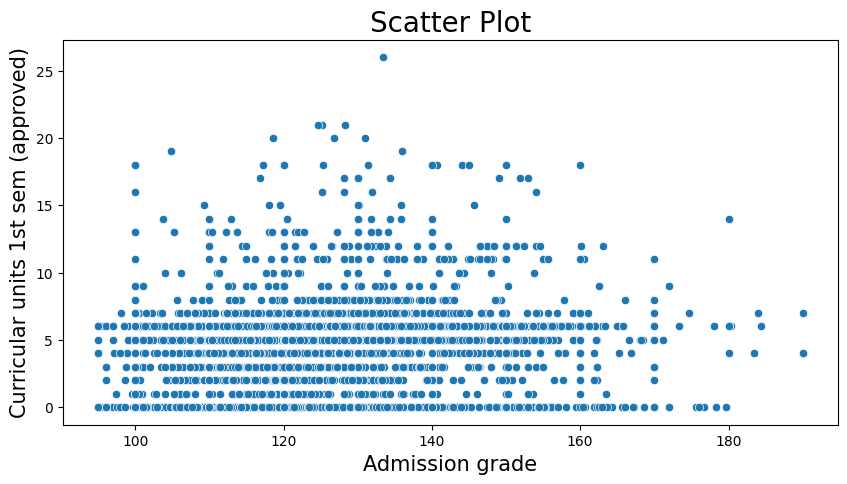

In [14]:
plt.rcParams["figure.figsize"] = (10,5)
sns.scatterplot(data=ds, x="Admission grade", y="Curricular units 1st sem (approved)",palette = "dark")
plt.title("Scatter Plot",fontsize=20)
plt.xlabel("Admission grade",fontsize=15)
plt.ylabel("Curricular units 1st sem (approved)",fontsize=15)
plt.show()

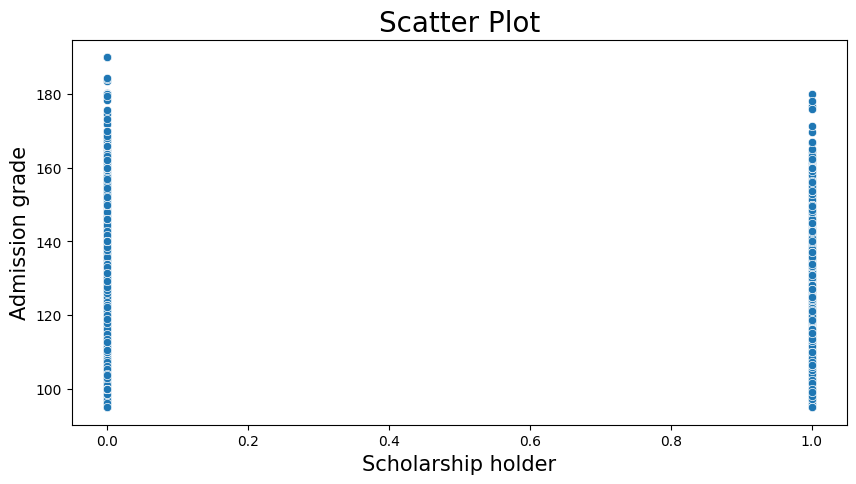

In [16]:
plt.rcParams["figure.figsize"] = (10,5)
sns.scatterplot(data=ds, x="Scholarship holder", y="Admission grade",palette = "dark")
plt.title("Scatter Plot",fontsize=20)
plt.xlabel("Scholarship holder",fontsize=15)
plt.ylabel("Admission grade",fontsize=15)
plt.show()

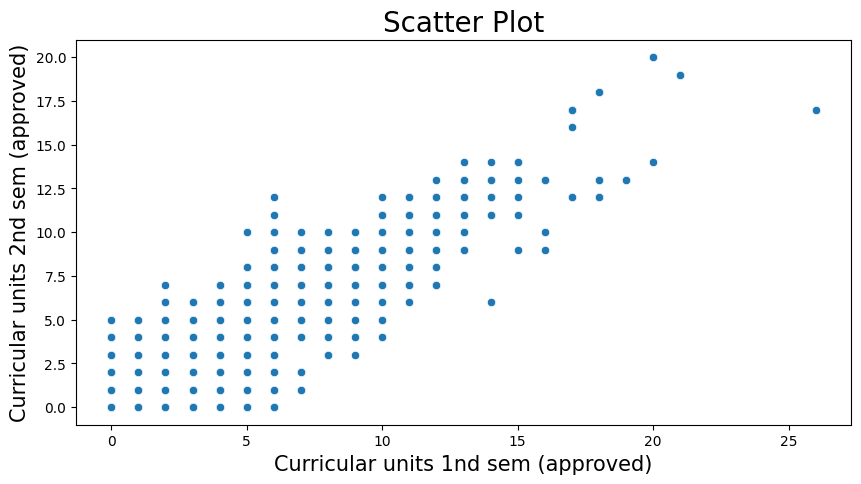

In [17]:
plt.rcParams["figure.figsize"] = (10,5)
sns.scatterplot(data=ds, x="Curricular units 1st sem (approved)", y="Curricular units 2nd sem (approved)",palette = "dark")
plt.title("Scatter Plot",fontsize=20)
plt.xlabel("Curricular units 1nd sem (approved)",fontsize=15)
plt.ylabel("Curricular units 2nd sem (approved)",fontsize=15)
plt.show()

In [19]:
ds.pivot_table([ 'Curricular units 1st sem (credited)',
                'Curricular units 1st sem (enrolled)',
                'Curricular units 1st sem (evaluations)',
                'Curricular units 1st sem (approved)',
                'Curricular units 1st sem (grade)',
                'Curricular units 1st sem (without evaluations)',
                'Curricular units 2nd sem (credited)',
                'Curricular units 2nd sem (enrolled)',
                'Curricular units 2nd sem (evaluations)',
                'Curricular units 2nd sem (approved)',
                'Curricular units 2nd sem (grade)',
                'Curricular units 2nd sem (without evaluations)'
            ],
               ['Attendance'], aggfunc='mean')

,Curricular units 1st sem (approved),Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations)
Attendance,,,,,,,,,,,,
Evening Classes,4.684308,0.728648,6.251631,8.301601,10.604660,0.200351,4.369217,0.568500,6.194343,7.983577,10.121947,0.169039
Full-Time,4.808795,0.730839,6.389158,8.548358,10.679946,0.120721,4.490876,0.591481,6.348641,8.303655,10.329993,0.156022
Online,4.682353,0.684259,6.296225,8.280556,10.581162,0.124767,4.536111,0.521781,6.220963,8.157696,10.309928,0.157407
Part-Time,4.613208,0.695730,6.210526,8.071174,10.677897,0.092559,4.352313,0.517857,6.187729,7.808608,10.174409,0.119217


In [22]:
scholarship_holders_df=ds[ds['Scholarship holder']==1]
non_scholarship_holders_df= ds[ds['Scholarship holder']==0]
scholarship_holders= ds[ds['Scholarship holder']==0].shape[0]
notscholarship_holders= ds[ds['Scholarship holder']==1].shape[0]
print("Total students which are Scholarship holders {} ".format(coemissioned))

Total students which are Scholarship holders 3325 


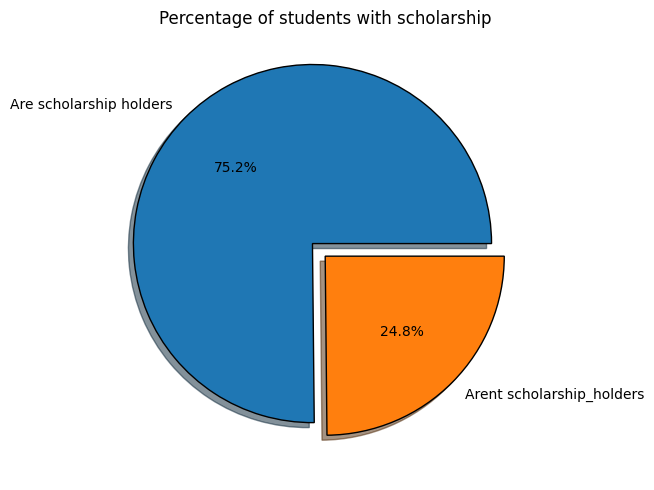

In [25]:
plt.rcParams["figure.figsize"] = (7,5)
slices=[scholarship_holders,notscholarship_holders]
labels=['Are scholarship holders','Arent scholarship_holders']
explode=[0.1,0]
plt.pie(slices,labels=labels,explode=explode,wedgeprops={'edgecolor':'black'},shadow=True,autopct='%1.1f%%')
plt.title("Percentage of students with scholarship")
plt.tight_layout()
plt.show()

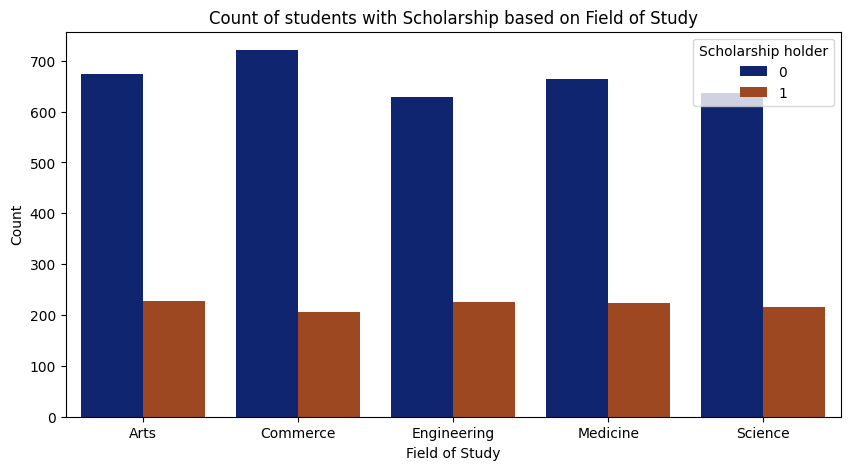

In [27]:
ds['Scholarship holder'] = ds['Scholarship holder'].astype(str)
plt.rcParams["figure.figsize"] = (10,5)
grouped_data=ds.groupby(['Field of Study', 'Scholarship holder']).size().reset_index(name="Count")
sns.barplot(data=grouped_data, x="Field of Study", y="Count", hue="Scholarship holder", palette="dark")
plt.title("Count of students with Scholarship based on Field of Study")
plt.show()

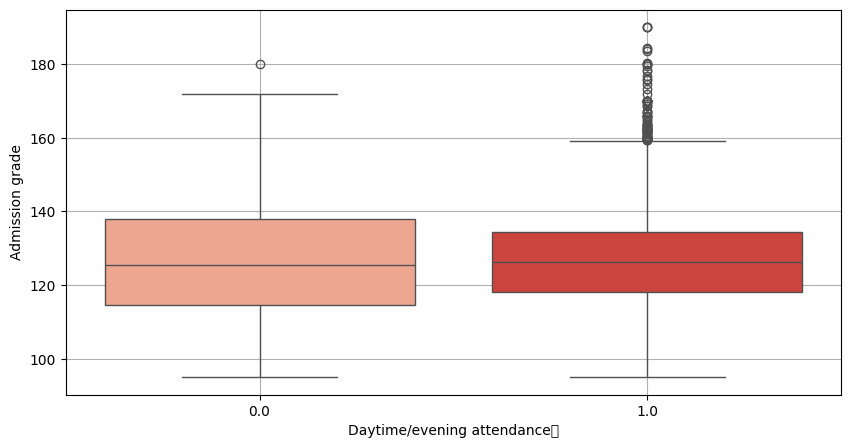

In [28]:
plt.rcParams["figure.figsize"] = (10,5)
fig, ax = plt.subplots() 
sns.boxplot(x=ds["Daytime/evening attendance\t"],y=ds['Admission grade'],palette = "Reds", ax=ax)

ax.yaxis.grid(True) # Hide the horizontal gridlines
ax.xaxis.grid(True) # Show the vertical gridlines

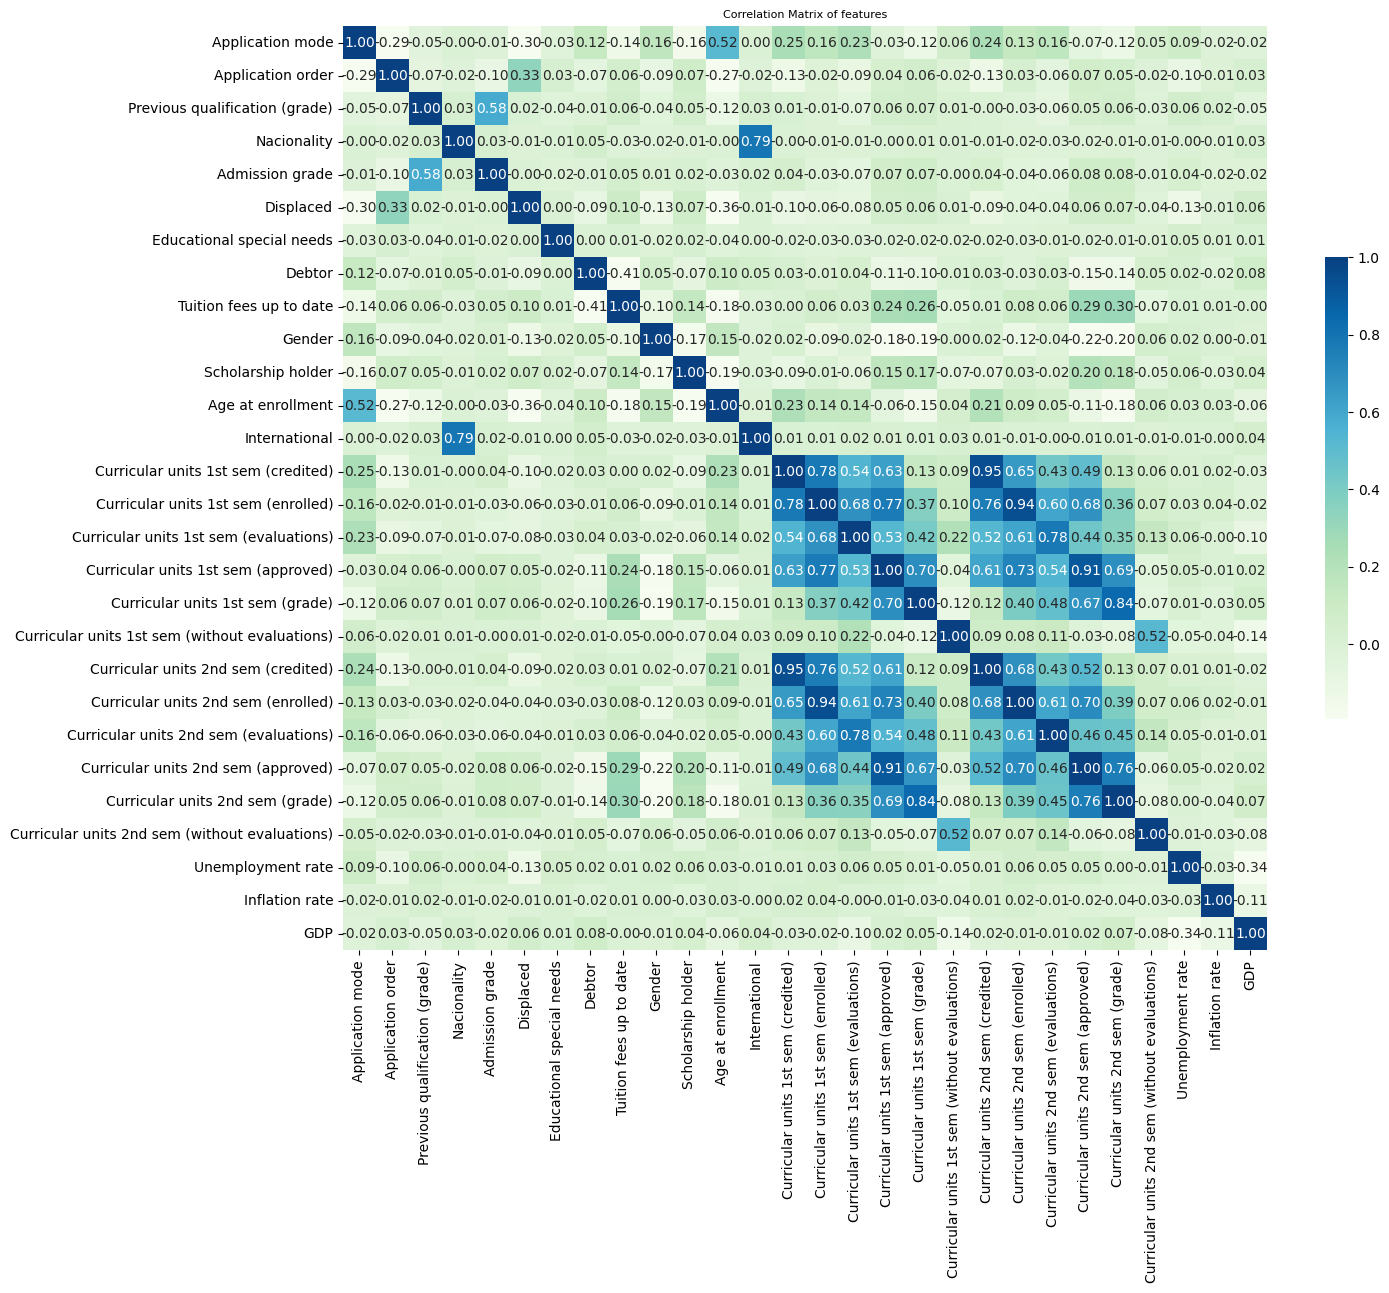

In [32]:
col_for_corr = ['Application mode', 'Application order', 'Previous qualification (grade)', 'Nacionality', 'Admission grade', 'Displaced', 'Educational special needs', 'Debtor', 'Tuition fees up to date', 'Gender', 'Scholarship holder', 'Age at enrollment', 'International', 'Curricular units 1st sem (credited)', 'Curricular units 1st sem (enrolled)', 'Curricular units 1st sem (evaluations)', 'Curricular units 1st sem (approved)', 'Curricular units 1st sem (grade)', 'Curricular units 1st sem (without evaluations)', 'Curricular units 2nd sem (credited)', 'Curricular units 2nd sem (enrolled)', 'Curricular units 2nd sem (evaluations)', 'Curricular units 2nd sem (approved)', 'Curricular units 2nd sem (grade)', 'Curricular units 2nd sem (without evaluations)', 'Unemployment rate', 'Inflation rate', 'GDP']

plt.rcParams["figure.figsize"] = (15,12)
correlation_matrix = ds[col_for_corr].corr()
sns.heatmap(
    correlation_matrix,
    vmax=1,
    square=True,
    annot=True,
    fmt='.2f',
    cmap='GnBu',
    cbar_kws={"shrink": .5},
    robust=True)
plt.title('Correlation Matrix of features', fontsize=8)
plt.show()

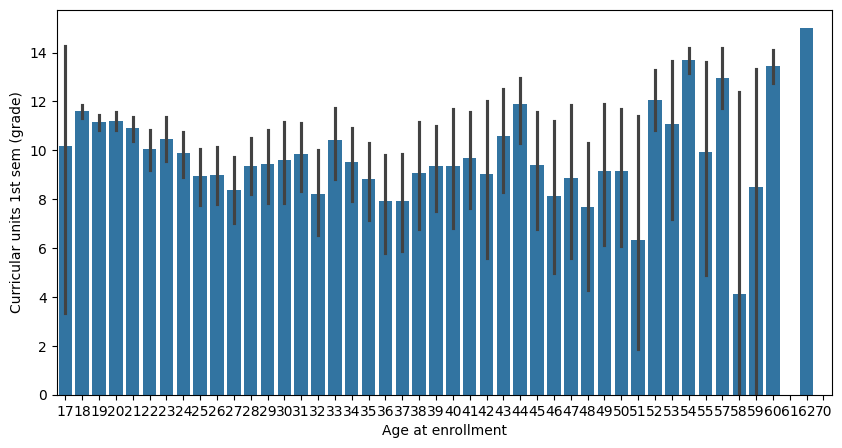

In [35]:
plt.rcParams["figure.figsize"] = (10,5)
graph = ds[["Age at enrollment", "Curricular units 1st sem (grade)"]]
ax = sns.barplot(x="Age at enrollment", y="Curricular units 1st sem (grade)", data=graph)

<Axes: >

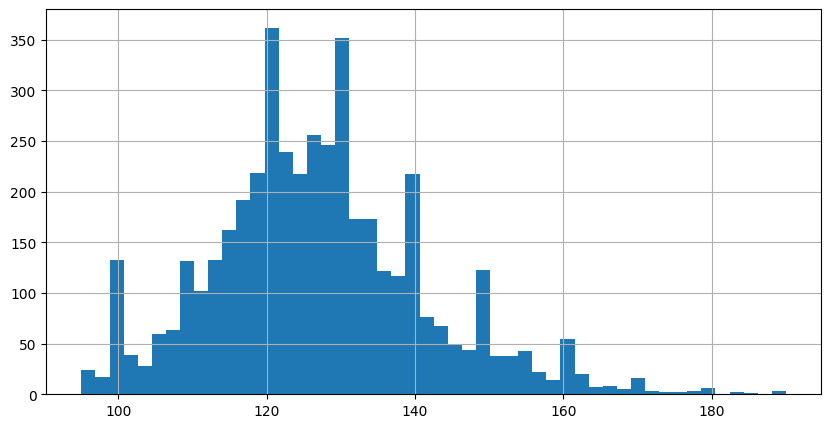

In [46]:
ds[ds['Admission grade']>5]['Admission grade'].hist(bins=50)

<Axes: >

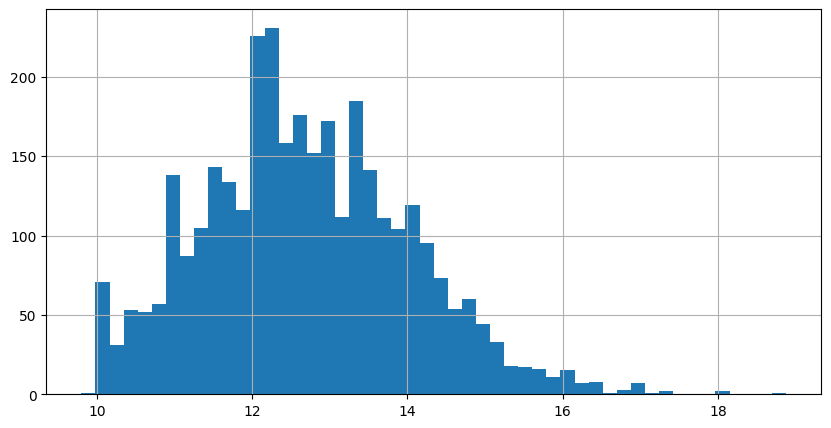

In [43]:
ds[ds['Curricular units 1st sem (grade)']>5]['Curricular units 1st sem (grade)'].hist(bins=50)

In [55]:
def plot_distro(df, col = '', y_limit=None, x_limit_r=None, x_limit_l = None):
    plt.figure(figsize=(7,7))
    plt.grid(True)
    sns.distplot(df[col][df.Debtor == 1])
    sns.distplot(df[col][df.Debtor == 0])
    plt.legend(['Is Debtor', 'Not Debtor'])
    if y_limit:
        plt.ylim(top=y_limit)
    if x_limit_r:
        plt.xlim(right=x_limit_r)
    if x_limit_l:
        plt.xlim(left=x_limit_l)
    plt.show()

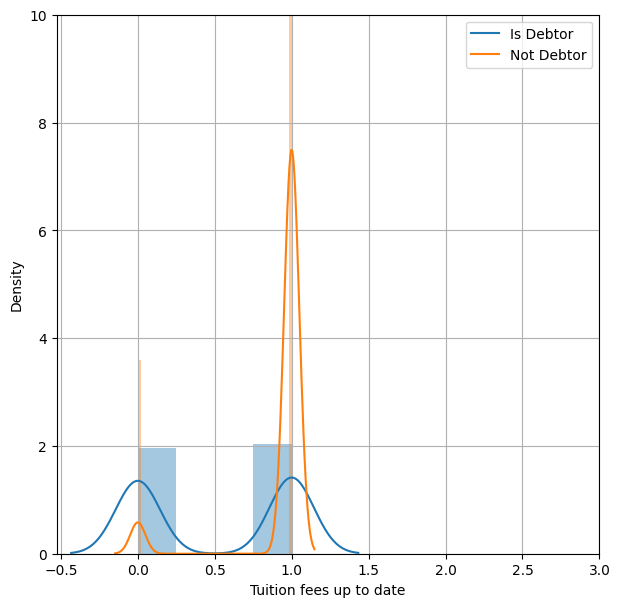

In [67]:
plot_distro(ds, col='Tuition fees up to date', x_limit_r=3, y_limit=10, x_limit_l = 0)